In [14]:
from pprint import pprint

import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, rc={"lines.linewidth": 3.0})
sns.set_style("whitegrid")




In [29]:
#L*=5

#maximum seed population value
seedmax_val = [0.0002990611143479856, 0.0002990611143479856, 0.000531311729397025, 0.0005234722621237897, 
               0.0002207967583623539, 9.74168394721952e-05, 0.0003160119786186741, 0.00034338566842746115, 
               0.0006803480299367869, 0.0006803480299367869, 0.00013741853980721796, 0.00033925364020336566, 
               0.000665074044112638, 0.0005788815571994998, 1.3655609863872037e-05, 0.0004877042465989597, 
               0.0005843720644838307, 6.474914399953268e-05, 0.00026786000941606274, 0.0005021268408914596, 
               0.0005243476183451545, 0.0003834465561694196, 0.000564546636575887, 0.0004248102657456649, 
               0.0008649070796018285, 0.00025553069319353904, 0.0007355200165577263, 0.0007355200165577263,
               0.0002975867420096566, 0.0006685893742756333, 0.0005066668417274267, 0.0003559947384003246,
               0.000365221218910929, 0.0006254363840817712, 0.0006254363840817712, 0.0003488164503945853, 
               0.0005901241374031803, 0.00018758447705584039, 0.00047075590982648125, 5.2324150588119254e-05,
               0.0005356436133933889, 8.56159425485535e-05, 0.0003979960591440539, 0.0004295150070307309, 
               6.080485287615649e-05, 3.970431325395882e-05, 3.970431325395882e-05, 0.00018297871545952987,
               0.0006225270203777263, 0.00010722760370306954, 0.0008649331239747309, 0.00014765067818359341,
               6.0198626258243325e-05, 6.291938224183718e-05, 5.9821160443190196e-05, 0.00036921372777456215,
               0.0003583129515388675, 0.0003913177729485919, 0.0005210627913956429, 0.0005210627913956429, 
               0.00012611078552858204, 0.00033157666242918083, 0.0003378449417624261, 4.861350523984809e-05,
               1.9763612915907125e-05, 0.00024035216184113586, 0.0003653396574218493, 0.00015381655522986998,
               0.0004016374050197178, 0.0004016374050197178, 0.00044775889011883045, 0.00019705504506020594,
               0.00015723762066144573, 0.000627372874619851, 0.0003903297399737636, 0.00024335247444901158,
               0.00024249175363643275, 0.0007343481118401235, 0.00038045247009662724, 0.00038045247009662724,
               0.00045684607990911715, 0.00019641080478790597, 0.0003269017434859474, 0.0003571763107968937,
               0.00043201382240062966, 0.0002786197113948019, 0.0002870790016799647, 0.0010120426603881273, 
               0.00025605878083551786, 0.00019125376134348604, 0.0006907522839673214, 0.000701072032799377, 
               0.000701072032799377, 0.0005972582117300513, 0.0004986763085726612, 0.0006412109487693505, 
               0.00045393518544736844, 0.0005885386027707712, 0.0006553877689763612, 0.0005627919514035805,
               0.0014168348776998172, 0.00040116329814251324, 0.00016072004602513742, 0.00017835435925593862,
               0.00048001667010540876, 0.000869758752494404, 0.0006026335380801349]
#increase in the core population
corerat_val = [16.670810724091442, 43.36557388287864, 1.3283484142728061, 1.5184278068717187, 0.9196488854683812,
               0.49919861784444947, 5.3469887002141645, 6.8856851537382555, 20.131201245602306, 32.41877030258003,
               1.0550629376560645, 3.8107137978354126, 3.0514390644347964, 1.371771439487855, 0.3096320297042438,
               13.283277423709842, 1.5478629320262391, 0.2673221474344889, 2.546495802579794, 3.461139606742704,
               1.063794263379976, 1.2844203425285712, 6.072048794919801, 0.5361134698700882, 9.903333994680803, 
               0.3549861927253902, 4.186793260676982, 7.24498053647465, 0.905655527479024, 5.2201520157594326, 
               1.5586659425920215, 0.2609120806661789, 6.128140601207132, 33.73261200718856, 8.142674857113313,
               0.7658762794418548, 3.786965497484526, 0.10495606001582602, 15.801063662894528, 0.500912102303832,
               3.6757131531633984, 0.2784006026092238, 26.988977281446065, 59.16298121174735, 0.6586834263015249,
               0.3320518237705121, 0.6315009126251203, 15.59767232035948, 58.321476760215745, 0.215059021552499,
               13.310761367274413, 0.546822163366981, 0.2600043140206489, 1.3461646889867465, 0.44058140708087107,
               20.896720698584517, 2.0236416227924425, 0.3685776304595419, 1.7756678838506283, 3.8119846736401586,
               3.4646035889566473, 3.5306029821720655, 7.1672676642863316, 1.015816358097816, 0.6726517616707344,
               7.147154367208953, 9.406779230616216, 0.4465601332973869, 5.3718925235807955, 12.970898805397768, 
               3.3542523946301337, 0.09589037869142354, 2.053541951816007, 4.381050246376981, 0.8498746288697071,
               0.5573736136196523, 0.25350502397338487, 10.22517446742616, 1.2101236845701984, 1.8750474820855751,
               12.911355022580807, 1.2740460783276069, 1.5965844401299234, 1.643065455112031, 6.626754398336661, 
               1.2429677385940987, 2.5329564611215174, 58.27996578067712, 0.4151141054555045, 0.34878312593906463,
               14.380774450568547, 44.08130139763712, 53.242673366385354, 3.196335295518675, 0.5727410269469351,
               5.523559604684438, 0.7261448095463899, 2.9271060132954116, 4.041379404446822, 1.7613980723971827, 
               1.2654578859520698, 1.1724331343962082, 0.4702240173182364, 0.8224788126365147, 10.109459436740158,
               37.80700151235887, 14.12225402398072]
seedmax_val = np.array(seedmax_val)
corerat_val = np.array(corerat_val)
sind = np.argsort(seedmax_val)
seedmax_val = seedmax_val[sind]
corerat_val = corerat_val[sind]

In [30]:
#L* = 4.5
seedmax_val_45 = [5.246878633710551e-05, 0.00018165299126680201, 0.00029658291852135667, 8.756274620304171e-05, 6.940914161554346e-05, 5.2610888186692555e-05, 0.000531092607082684, 0.000531092607082684, 0.0003674630289431933, 0.00036410575679356, 6.147969170661239e-06, 0.00038817376092055607, 0.0004247301636114263, 0.0006516192180344713, 0.000373834485164625, 0.0005004015285769133, 0.0003864315268227854, 0.0005080163530693225, 0.00018603176883129523, 0.0004827667529088876, 0.0004515486374438686, 0.0004015075544945959, 0.0004015075544945959, 0.0008466805305193642, 0.00010040070852364907, 0.0008256704582966334, 0.0008256704582966334, 0.00043461894318008363, 0.00043461894318008363, 0.00040451634785096976, 0.00035459445738629763, 3.661066117799352e-05, 0.0004564144294514288, 0.0004564144294514288, 0.00026937581607431726, 0.0006089292053504412, 0.00010817167176228198, 0.00010817167176228198, 2.7694206594416355e-05, 0.00022517136984999113, 0.0001839413112893237, 0.0001839413112893237, 8.20890357891373e-06, 0.0001469940262186841, 0.0001469940262186841, 4.031932356021855e-06, 0.00031391674953957295, 0.00031391674953957295, 0.0004275791895343508, 0.00011223974612133917, 1.1570779164570047e-05, 5.669523026225111e-06, 5.9845879901877475e-06, 1.3519286579340264e-05, 1.3519286579340264e-05, 0.0003162722615541201, 0.0003162722615541201, 0.00021638684587457795, 0.00030933424708875395, 0.00030933424708875395, 0.00023443613300365418, 0.00011195264719117218, 0.00011195264719117218, 5.907099232350177e-05, 8.56268785531437e-05, 8.56268785531437e-05, 7.866496082542564e-06, 1.1100397128942685e-05, 2.342959370305809e-05, 6.980238624905286e-05, 7.046223153675429e-05, 7.046223153675429e-05, 0.00045225454039803483, 0.00045225454039803483, 0.00014689733060335312, 6.801066115309208e-05, 0.00041520720326051867, 0.0002463391250008079, 0.00017861299603676232, 0.00019308988058874813, 0.000418690217250285, 0.0001580388080165723, 0.0001580388080165723, 0.0005524779132197518, 0.00030590702110255765, 0.0003989658261141596, 2.8916909495898274e-05, 3.6194435882156255e-05, 0.0001501932949155686, 0.0004437714124487916, 0.0003053641271785612, 0.0003053641271785612, 0.0002667884326716044, 0.0003360481480365452, 0.0007311698323139856, 0.000393388992686943, 0.000393388992686943, 0.00010544803967375527, 0.00010544803967375527, 0.0005525975265752774, 0.0004673545860652119, 0.0004673545860652119, 0.0006548442085909884, 0.0003637494373195104, 0.0005929232763453327, 0.0004153606938832254, 0.0003702070142477291, 0.0009998154632931409, 0.0005803910376482966, 0.0003309555302150204, 0.00021517956436190415, 0.0004082127157429657, 0.0007549558217333013, 0.0007549558217333013, 0.00019447768931917637, 0.0003805139800812456, 0.0003783276250499462]
corerat_val_45 = [2.188215390873658, 4.575040666414154, 1.1927084664277028, 1.2515180678651756, 0.7123030332402277, 1.7708246226174298, 24.198156780481625, 21.973693495023824, 2.610460349610825, 1.740663331007007, 0.8366934382148781, 4.070538521352322, 12.331383402477394, 2.1948331680257382, 3.445134987264246, 4.688670677267955, 0.962117075043101, 2.001858763344433, 1.0442695942112847, 7.427423996534449, 0.872150831778785, 0.5856718235863375, 0.8702915751472288, 8.091052499091147, 0.2567318193236789, 3.8825088475466383, 5.090865383707125, 1.1025482092787058, 1.768733485938299, 1.8322565124734203, 0.30455523691259095, 1.1094870585271843, 38.62583293969813, 26.544302724054333, 0.5473293796858054, 2.520264142745712, 0.08541059600462604, 0.13535834430986995, 0.5388024495920141, 14.844990354871799, 2.1274594264882825, 2.39342052921744, 0.41180201933935007, 4.073019765029032, 15.024736753178333, 0.6980239928477399, 24.100670826552385, 30.471423146996305, 11.392596897556896, 0.16100824774110084, 0.2799078567108272, 1.0061915659128295, 1.5627768214577304, 0.5691678919691525, 0.6946853875569085, 62.24099257201377, 21.64707365370655, 0.8988481313582575, 0.6977063497258287, 1.0358933711621738, 2.536020566537335, 0.45857420656157244, 0.6757395733497608, 0.7296729100977573, 1.4881892832699963, 2.587780809335484, 0.42230514090516336, 1.5821595767163403, 6.698464777553393, 9.53504231836424, 0.4401468572568702, 1.2377281229166455, 18.292824630871813, 31.200238298443786, 0.02989548632891883, 1.2238545609015563, 32.35891178837862, 0.6136673723426219, 0.3480970371500274, 0.27935308163930705, 13.633161681916118, 0.4119984604277417, 0.6662374738657045, 11.021690151396376, 8.968576260133348, 4.656716034403837, 0.43959240496896623, 0.5481354005985736, 1.993951394898905, 14.124472902054727, 0.5147337791015943, 1.6157431346185618, 0.983686068255992, 4.366444919703654, 47.50395316542659, 0.579611780063317, 1.101749422145153, 0.2998468026430874, 0.4204262695170533, 7.524632725437591, 8.701873940880146, 17.210615761472923, 2.353190332895701, 0.32540003601366185, 17.916553933492377, 0.2902768843995949, 2.910172488242394, 14.60122312419903, 6.57596282549993, 0.6993237863027661, 0.7673947686726921, 5.0824416593014154, 19.42195827966361, 40.15640988984378, 0.9398402139146319, 2.1375852270740108, 6.8503096744436185]
seedmax_val_45 = np.array(seedmax_val_45)
corerat_val_45 = np.array(corerat_val_45)

(0.1, 100.0)

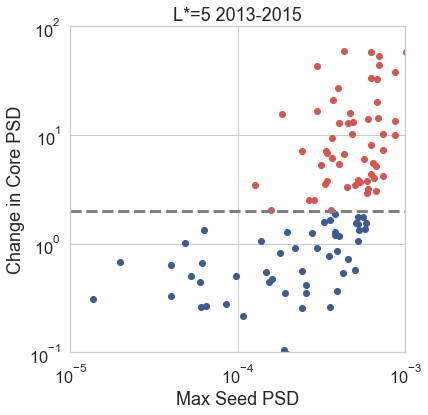

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(seedmax_val[corerat_val < 2.0],corerat_val[corerat_val < 2.0],c=sns.xkcd_rgb['denim blue'])
plt.scatter(seedmax_val[corerat_val > 2.0],corerat_val[corerat_val > 2.0],c=sns.xkcd_rgb["pale red"])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Max Seed PSD')
plt.ylabel('Change in Core PSD')
plt.title('L*=5 2013-2015')
plt.axhline(2.0,linestyle='--',c='gray')
plt.xlim(1e-5,1e-3)
plt.ylim(1e-1,1e2)

(0.1, 100.0)

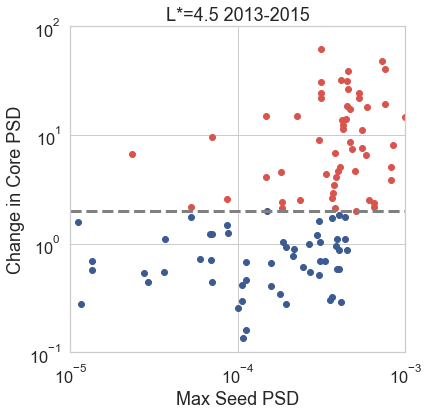

In [32]:
plt.figure(figsize=(6,6))
plt.scatter(seedmax_val_45[corerat_val_45 < 2.0],corerat_val_45[corerat_val_45 < 2.0],c=sns.xkcd_rgb['denim blue'])
plt.scatter(seedmax_val_45[corerat_val_45 > 2.0],corerat_val_45[corerat_val_45 > 2.0],c=sns.xkcd_rgb["pale red"])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Max Seed PSD')
plt.ylabel('Change in Core PSD')
plt.title('L*=4.5 2013-2015')
plt.axhline(2.0,linestyle='--',c='gray')
plt.xlim(1e-5,1e-3)
plt.ylim(1e-1,1e2)


# What is the probability that core PSD rises by >2x as a function of maximum seed PSD¶

This uses the data from Boyd et al 2016 Figure 5 left.

Boyd, A. J., H. E. Spence, C‐L. Huang, G. D. Reeves, D. N. Baker, D. L. Turner, S. G. Claudepierre, J. F. Fennell, J. B. Blake, and Y. Y. Shprits. "Statistical properties of the radiation belt seed population." Journal of Geophysical Research: Space Physics (2016).

http://onlinelibrary.wiley.com/doi/10.1002/2016JA022652/full


## Method

Using a statistical model of the relationship between the change of Core PSD being >2x.

We model the number of Core PSD events being >2x as a random sample from a binomial distribution, where a success is >x2 and failure is <2x.

We are to belive that the increase is dependent on the log of the maximum seed poopulation.

$ change \sim Bin(n,p) \\ logit(p) = \alpha + \beta x \\ a \sim N(0,5) \\ \beta \sim N(0,10) $

where we set vague priors for $\alpha$ and $\beta$, the parameters for the logistic model.

This is the same technique used in the estimation of deaths due to a concentration of a chemical.


## Oberved Data:

    n_pts : the number of points in each of the 10 log spaced Maximum Seed PSD bins
    successes : the number of events in each Maximum Seed PSD bins where the increase was >2x
    seed_bins_centers : the centers of the Maximum Seed PSD bins



## L*=5 data

array([1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9])

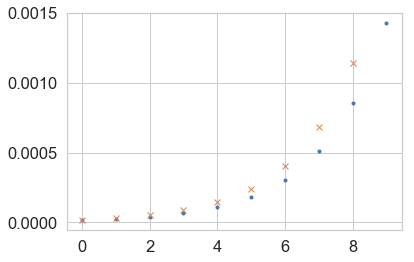

In [63]:
# prep the data


# need to compute a probability of change in max seed bins
seed_bins = np.logspace(np.log10(seedmax_val.min()-seedmax_val.min()*0.01),
                        np.log10(seedmax_val.max()+seedmax_val.max()*0.01), 10) # 10 bins
seed_digs = np.digitize(seedmax_val, seed_bins)
seed_bins_centers = np.diff(seed_bins)/2 + seed_bins[:-1]
plt.plot(seed_bins, '.')
plt.plot(seed_bins_centers, 'x')

# need the number of points in each of the seed bins
XX = np.arange(20)
n_pts_5 = np.histogram(seed_digs, XX)[0]
seed_digs

/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


array([1.35190538e-05, 2.26940669e-05, 3.80959112e-05, 6.39505673e-05,
       1.07352073e-04, 1.80208998e-04, 3.02511930e-04, 5.07818528e-04,
       8.52461115e-04, 1.43100323e-03])

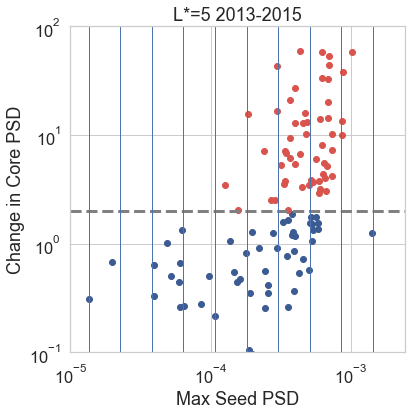

In [64]:
plt.figure(figsize=(6,6))
plt.scatter(seedmax_val[corerat_val < 2.0],corerat_val[corerat_val < 2.0],c=sns.xkcd_rgb['denim blue'])
plt.scatter(seedmax_val[corerat_val > 2.0],corerat_val[corerat_val > 2.0],c=sns.xkcd_rgb["pale red"])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Max Seed PSD')
plt.ylabel('Change in Core PSD')
plt.title('L*=5 2013-2015')
plt.axhline(2.0,linestyle='--',c='gray')
plt.xlim(1e-5,1e-3)
plt.ylim(1e-1,1e2)
for a in seed_bins:
    plt.axvline(a, lw=1)
plt.xlim((seed_bins.min()-1e-4, seed_bins.max()+1e-3))
seed_bins

Need to then group up all the points in each bin and calculate the probability of siccess in each one

In [65]:
seed_digs

array([1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9])

In [94]:
# get the number in each bin
n_pts_5, bin_num_5 = np.histogram(seed_digs, np.arange(1, seed_digs.max()+2))
n_pts_5, bin_num_5

(array([ 2,  0,  8,  4,  7, 17, 34, 30,  5]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [102]:
# get the number of successes in each bin
successes_5 = np.zeros(len(n_pts_5)+1)

for ii in range(1, len(bin_num_5)+1):
    successes_5[ii-1] = len(corerat_val[seed_digs==ii][corerat_val[seed_digs==ii] > 2.0])
successes_5 = successes_5[:-1]   # some index thing off


In [103]:
# plt.plot(bin_num_5[:-1], successes_5/n_pts_5)

In [104]:
successes_5, n_pts_5

(array([ 0.,  0.,  0.,  0.,  2.,  6., 20., 23.,  4.]),
 array([ 2,  0,  8,  4,  7, 17, 34, 30,  5]))

In [15]:

print('seed_bins_centers', len(seed_bins_centers), seed_bins_centers)
print(seed_digs)
n_pts = []
for v in np.unique(seed_digs):
    n_pts.append((v, (seed_digs==v).sum() ))
print('n_pts', n_pts)
successes = []
for ind,v in n_pts:
    mask = seed_digs == ind
    successes.append(change_bin[mask].sum())
    

print('successes', len(successes), successes)

n_pts = np.asarray([v[1] for v in n_pts])
print('n_pts', len(n_pts), n_pts)
seed_bins_centers = seed_bins_centers[seed_digs.min()-1:]


In [13]:
# define invlogit function
def invlogit(x):
    return pymc.exp(x) / (1 + pymc.exp(x))

In [ ]:
with pm.Model() as model:
    # define priors
    alpha = pm.Normal('alpha', mu=0, sd=5)
    beta = pm.Flat('beta')

    # define likelihood
    p = invlogit(alpha + beta*x)
    y_obs = pm.Binomial('y_obs', n=n, p=p, observed=y)

    # inference
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)

In [ ]:
# define priors
# these are wide uninformative priors
# alpha = pymc.Normal('alpha', mu=0, tau=1.0/5**2)
# beta = pymc.Normal('beta', mu=0, tau=1.0/10**2)
alpha = pymc.Uniform('alpha', 0,40)
beta = pymc.Uniform('beta', 0,40)


# define likelihood
p = pymc.InvLogit('p', alpha + beta*seed_bins_centers)
print('n_pts', n_pts, 'p', p, 'successes', successes, )

y = pymc.Binomial('y_obs', n=n_pts, p=p, value=successes, observed=True)

# inference
m = pymc.Model([alpha, beta, y])
mc = pymc.MCMC(m)
mc.sample(iter=501000, burn=1000, burn_till_tuned=True, thin=80)

